Interpolation using nearest neighbour method:


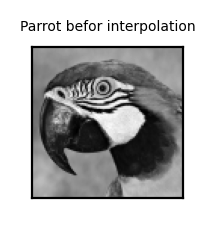

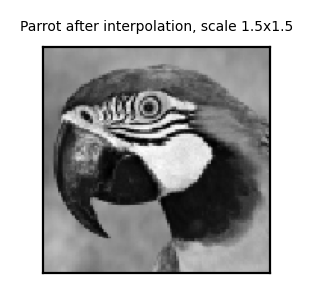

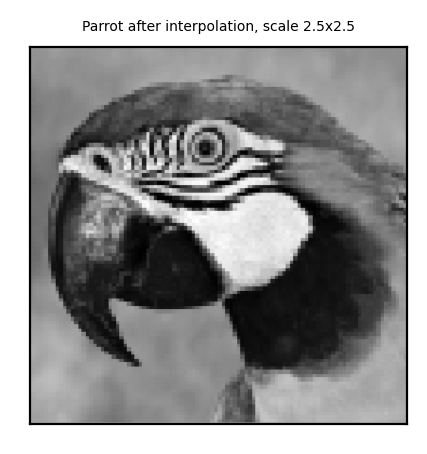

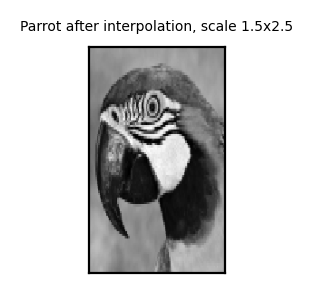

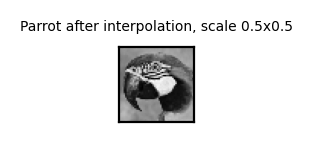

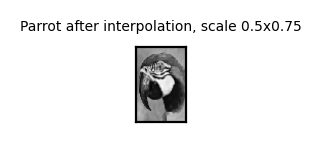

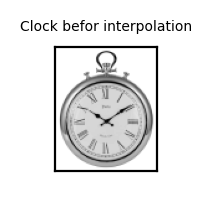

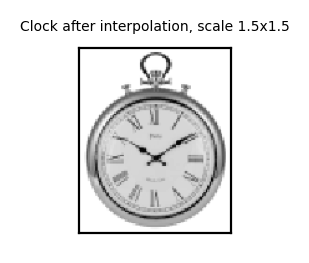

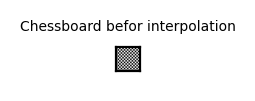

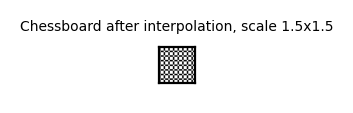

Interpolation using bilinear method:


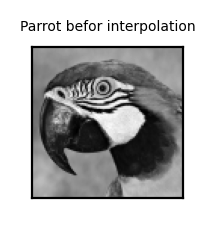

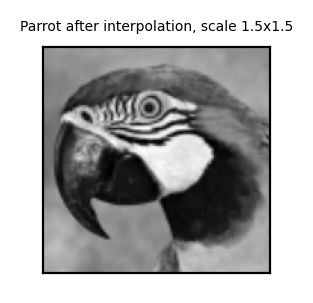

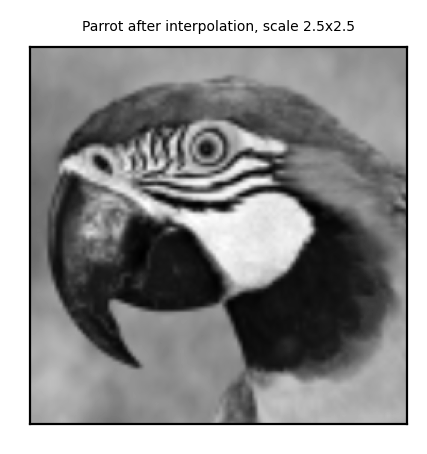

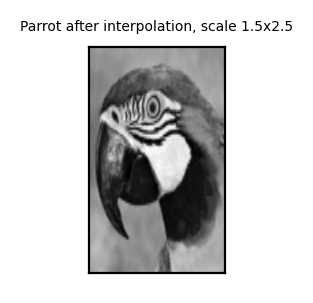

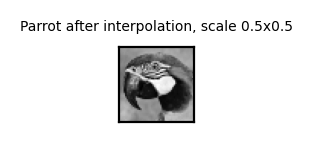

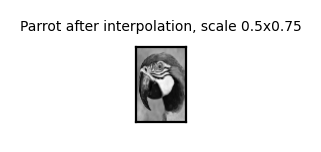

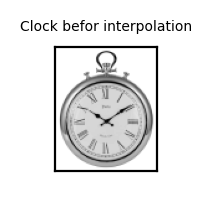

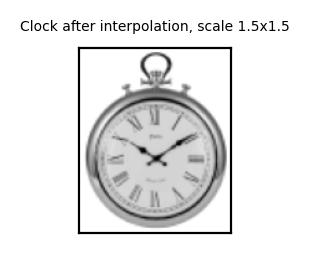

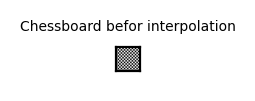

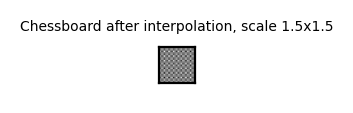

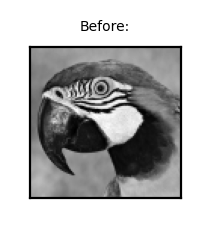

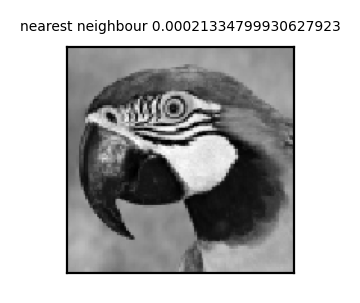

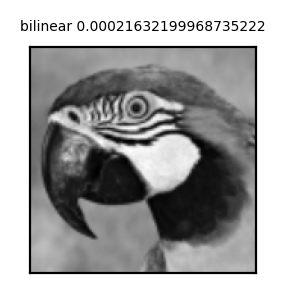

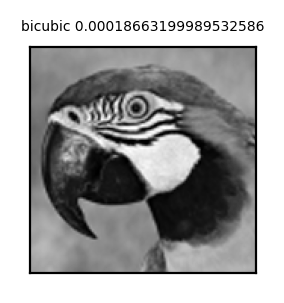

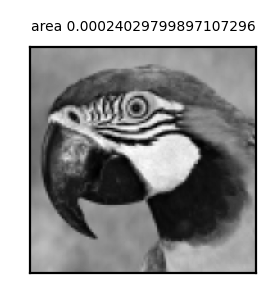

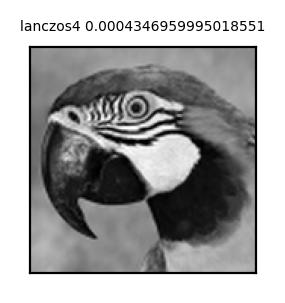

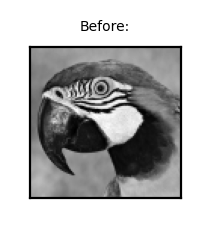

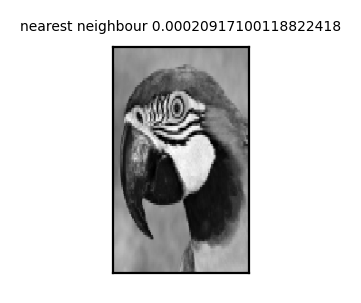

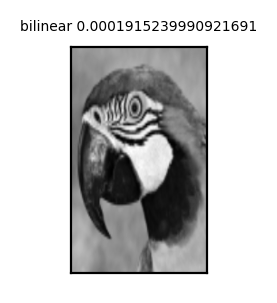

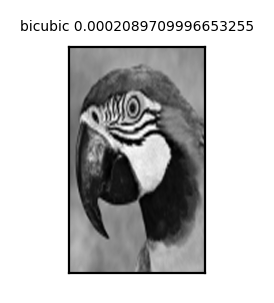

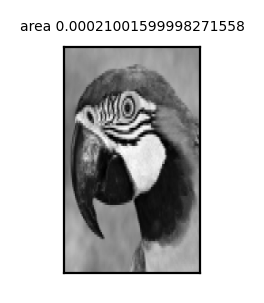

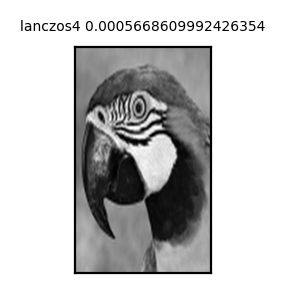

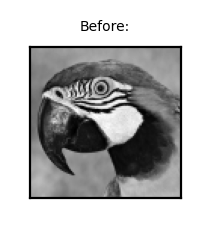

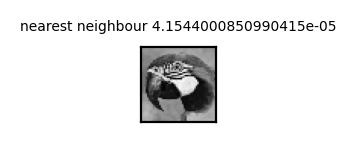

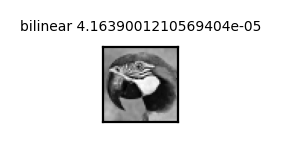

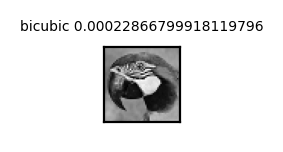

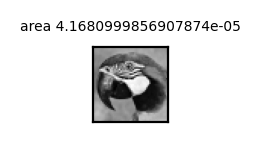

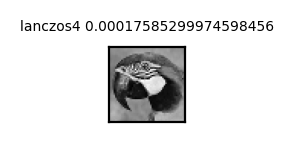

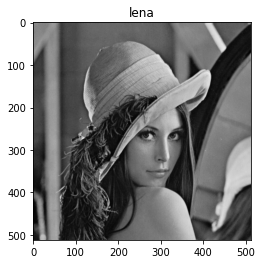

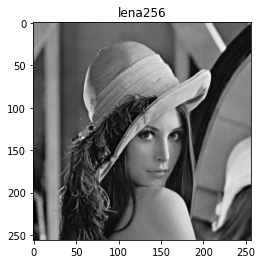

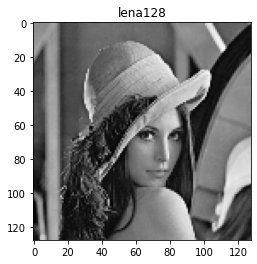

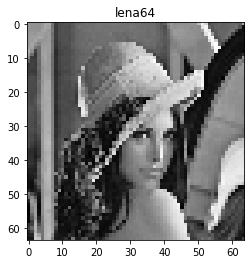

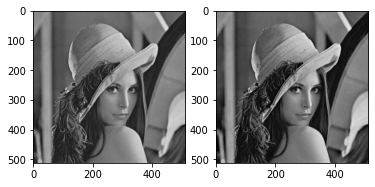

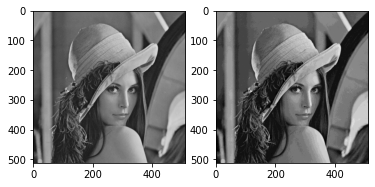

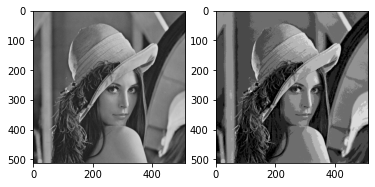

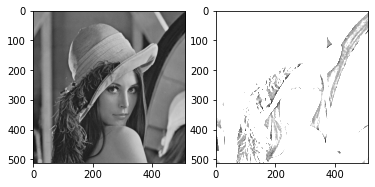

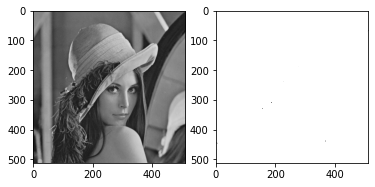

In [18]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from timeit import default_timer as timer


# Load required files
if not os.path.exists("parrot.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp 
if not os.path.exists("clock.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/clock.bmp 
if not os.path.exists("chessboard.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/chessboard.bmp 
if not os.path.exists("lena.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/lena.bmp 
if not os.path.exists("firetruck.jpg") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/firetruck.jpg 


parrot = cv2.imread('parrot.bmp')           # Read image
parrot = cv2.cvtColor(parrot, cv2.COLOR_BGR2GRAY) # Convert to RGB



def showImage(img,title):
  plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
  plt.title(title,fontsize=5)
  plt.imshow(img, cmap ="gray")
  plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
  plt.show()
  

def nearestNeighbourInterpolation(img,scaleX,scaleY):

  y,x = img.shape
  x_new = int(x*scaleX)
  y_new = int(y*scaleY)

  
  newImg = np.zeros([y_new,x_new])
  # print(newImg)
  for i in range(y_new):
   
    for j in range(x_new):
      
      indY = round(i/scaleY)
      indX=round(j/scaleX)

      if indX < x and indY<y:
        newImg[i,j] = img[indY,indX]
      else:
        newImg[i,j] = img[y-1,x-1]


  return newImg

print("Interpolation using nearest neighbour method:")
showImage(parrot,"Parrot befor interpolation")

newImg = nearestNeighbourInterpolation(parrot,1.5,1.5)
showImage(newImg,"Parrot after interpolation, scale 1.5x1.5")

newImg = nearestNeighbourInterpolation(parrot,2.5,2.5)
showImage(newImg,"Parrot after interpolation, scale 2.5x2.5")

newImg = nearestNeighbourInterpolation(parrot,1.5,2.5)
showImage(newImg,"Parrot after interpolation, scale 1.5x2.5")

newImg = nearestNeighbourInterpolation(parrot,0.5,0.5)
showImage(newImg,"Parrot after interpolation, scale 0.5x0.5")

newImg = nearestNeighbourInterpolation(parrot,0.5,0.75)
showImage(newImg,"Parrot after interpolation, scale 0.5x0.75")

clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY) # Convert to RGB
showImage(clock,"Clock befor interpolation")
newImg = nearestNeighbourInterpolation(clock,1.5,1.5)
showImage(newImg,"Clock after interpolation, scale 1.5x1.5")

chessboard = cv2.imread('chessboard.bmp')           # Read image
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY) # Convert to RGB
showImage(chessboard,"Chessboard befor interpolation")
newImg = nearestNeighbourInterpolation(chessboard,1.5,1.5)
showImage(newImg,"Chessboard after interpolation, scale 1.5x1.5")



# # -----bilinear interpolation------

def bilinearInterpolation(img,scaleX,scaleY):
  y,x = img.shape
  x_new = int(x*scaleX)
  y_new = int(y*scaleY)

  newImg = np.zeros([y_new,x_new])

  y_ratio = float((y-1)/(y_new-1))
  x_ratio = float((x-1)/(x_new-1))

  for i in range(y_new):
    for j in range(x_new):
      
      x1 = math.floor(x_ratio*j)
      y1 = math.floor(y_ratio*i)
      x2 = math.ceil(x_ratio*j)
      y2 = math.ceil(y_ratio*i)

      x_weight = (x_ratio*j)-x1
      y_weight = (y_ratio*i)-y1

      if y1< y and x1<x:
        a = img[y1, x1]
      else:
        a = img[y-1, x-1]
      
      if y1< y and x2<x:
        b = img[y1, x2]
      else:
        a = img[y-1, x-1]
      
      if y2< y and x1<x:
        c = img[y2, x1]
      else:
        c = img[y-1, x-1]

      if y2< y and x2<x:
        d = img[y2, x2]
      else:
        d = img[y-1, x-1]

    
      
      

      newImg[i,j] = a * (1 - x_weight) * (1 - y_weight) + b * x_weight * (1 - y_weight) + c * y_weight * (1 - x_weight) +  d * x_weight * y_weight

  

  return newImg

print("Interpolation using bilinear method:")

showImage(parrot,"Parrot befor interpolation")
newImg = bilinearInterpolation(parrot,1.5,1.5)
showImage(newImg,"Parrot after interpolation, scale 1.5x1.5")

newImg = bilinearInterpolation(parrot,2.5,2.5)
showImage(newImg,"Parrot after interpolation, scale 2.5x2.5")

newImg = bilinearInterpolation(parrot,1.5,2.5)
showImage(newImg,"Parrot after interpolation, scale 1.5x2.5")

newImg = bilinearInterpolation(parrot,0.5,0.5)
showImage(newImg,"Parrot after interpolation, scale 0.5x0.5")

newImg = bilinearInterpolation(parrot,0.5,0.75)
showImage(newImg,"Parrot after interpolation, scale 0.5x0.75")

clock = cv2.imread('clock.bmp')           # Read image
clock = cv2.cvtColor(clock, cv2.COLOR_BGR2GRAY) # Convert to RGB
showImage(clock,"Clock befor interpolation")
newImg = bilinearInterpolation(clock,1.5,1.5)
showImage(newImg,"Clock after interpolation, scale 1.5x1.5")

chessboard = cv2.imread('chessboard.bmp')           # Read image
chessboard = cv2.cvtColor(chessboard, cv2.COLOR_BGR2GRAY) # Convert to RGB
showImage(chessboard,"Chessboard befor interpolation")
newImg = bilinearInterpolation(chessboard,1.5,1.5)
showImage(newImg,"Chessboard after interpolation, scale 1.5x1.5")



# ----interpolation using openCV

methods ={cv2.INTER_NEAREST : "nearest neighbour",
          cv2.INTER_LINEAR : "bilinear",
          cv2.INTER_CUBIC :"bicubic",
          cv2.INTER_AREA :"area",
          cv2.INTER_LANCZOS4 : "lanczos4"}

def _resize(img,y_new,x_new,method):
  start = timer()
  resized = cv2.resize(img,(y_new,x_new),interpolation=method)
  end = timer()
  duration = end-start

  
  showImage(resized,methods[method]+" "+str(duration))

def testCV2Resizing(img,scaleY,scaleX):
  y,x = img.shape
  y_new = int(scaleY*y)
  x_new = int(scaleX*x)

  showImage(img,"Before:")

  for method in methods.keys():
    _resize(img,y_new,x_new,method)




  


testCV2Resizing(parrot,1.5,1.5)
testCV2Resizing(parrot,1.5,2.5)
testCV2Resizing(parrot,0.5,0.5)



# ----- rozdzielczosc-----

lena = cv2.imread('lena.bmp')
lena = cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)
lena256 = cv2.resize(lena,(256,256),interpolation=cv2.INTER_LINEAR)
lena128 = cv2.resize(lena,(128,128),interpolation=cv2.INTER_LINEAR)
lena64 = cv2.resize(lena,(64,64),interpolation=cv2.INTER_LINEAR)




plt.title("lena")
plt.imshow(lena, cmap ="gray")
plt.show()

plt.title("lena256")
plt.imshow(lena256, cmap ="gray")
plt.show()

plt.title("lena128")
plt.imshow(lena128, cmap ="gray")
plt.show()


plt.title("lena64")
plt.imshow(lena64, cmap ="gray")
plt.show()





# -----liczba poziomow jasnosci-----

lena31 = np.zeros(lena.shape,'uint8')
cv2.normalize(lena,lena31,0,31,cv2.NORM_MINMAX)
fig,axs = plt.subplots(1,2)
axs[0].imshow(lena, 'gray', vmin=0, vmax=256)
axs[1].imshow(lena31, 'gray', vmin=0, vmax=31)

fig,axs = plt.subplots(1,2)
lena15 = np.zeros(lena.shape,'uint8')
cv2.normalize(lena,lena15,0,15,cv2.NORM_MINMAX)
axs[0].imshow(lena, 'gray', vmin=0, vmax=256)
axs[1].imshow(lena15, 'gray', vmin=0, vmax=15)

fig,axs = plt.subplots(1,2)
lena7 = np.zeros(lena.shape,'uint8')
cv2.normalize(lena,lena7,0,7,cv2.NORM_MINMAX)
axs[0].imshow(lena, 'gray', vmin=0, vmax=256)
axs[1].imshow(lena7, 'gray', vmin=0, vmax=7)

fig,axs = plt.subplots(1,2)
lena3 = np.zeros(lena.shape,'uint8')
cv2.normalize(lena,lena3,0,31,cv2.NORM_MINMAX)
axs[0].imshow(lena, 'gray', vmin=0, vmax=256)
axs[1].imshow(lena3, 'gray', vmin=0, vmax=3)

lena1 = np.zeros(lena.shape,'uint8')
cv2.normalize(lena,lena1,0,31,cv2.NORM_MINMAX)
fig,axs = plt.subplots(1,2)
axs[0].imshow(lena, 'gray', vmin=0, vmax=256)
axs[1].imshow(lena1, 'gray', vmin=0, vmax=1)
